In [133]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score
plt.rcParams["font.sans-serif"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False
sns.set(font='SimHei')  # 解决Seaborn中文显示问题并调整字体大小
# 指标模块
from sklearn.metrics import accuracy_score
java_data = pd.read_csv('./java_data1.csv')
python_data = pd.read_csv('./python_data1.csv')
mean_salary = (java_data['min_salary'] + java_data['max_salary']) / 2
offset = mean_salary - java_data['min_salary']
java_data = java_data.drop(['min_salary', 'max_salary'], axis = 1)
java_data['mean_salary'] = mean_salary
java_data['offset'] = offset

mean_salary = (python_data['min_salary'] + python_data['max_salary']) / 2
offset = mean_salary - python_data['min_salary']
python_data = python_data.drop(['min_salary', 'max_salary'], axis = 1)
python_data['mean_salary'] = mean_salary
python_data['offset'] = offset

def fun1(x):
    arr = []
    for val in x:
        if val < 25:
            arr.append(0)
        else:
            arr.append(1)
    return arr
def fun2(x):
    arr = []
    for val in x:
        if val < 5:
            arr.append(0)
        else:
            arr.append(1)
    return arr
java_data['mean_salary'] = fun1(java_data['mean_salary'])
java_data['offset'] = fun2(java_data['offset'])
python_data['mean_salary'] = fun1(python_data['mean_salary'])
python_data['offset'] = fun2(python_data['offset'])

#java
X_java = java_data.drop(['mean_salary', 'offset'], axis = 1)
y_java1 = java_data['mean_salary']
y_java2 = java_data['offset']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_java, y_java1, test_size = 0.2, random_state = 6)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_java, y_java2, test_size = 0.2, random_state = 6)

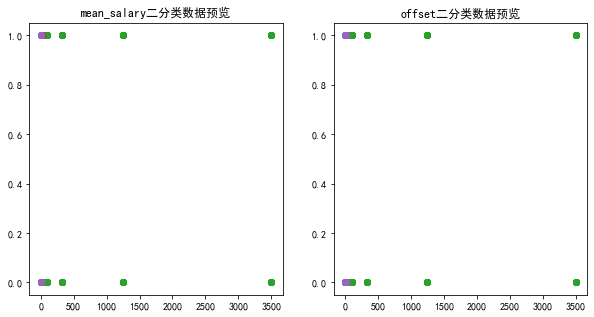

In [13]:
X = java_data.iloc[:, :-2]
y1 = java_data.iloc[:,-2]
y2 = java_data.iloc[:,-1]
p1 = plt.figure(figsize = (10, 5))
ax1 = p1.add_subplot(1, 2, 1)
ax2 = p1.add_subplot(1, 2, 2)
plt.sca(ax1)
plt.plot(X, y1, 'o')
plt.title("mean_salary二分类数据预览")
plt.sca(ax2)
plt.plot(X, y2, 'o')
plt.title("offset二分类数据预览")
plt.savefig("java_data二分类数据预览.png")   

In [53]:
#构造两个初始分类器
LR1 = LogisticRegression(penalty= 'l1', C= 0.5, solver = 'liblinear', random_state = 16)
LR2 = LogisticRegression(penalty= 'l2', C= 0.5, solver = 'liblinear', random_state = 16)
# 预测mean_slary
LR1.fit(X_train1, y_train1)
LR2.fit(X_train1, y_train1)
score1 = accuracy_score(LR1.predict(X_test1), y_test1)
score2 = accuracy_score(LR2.predict(X_test1), y_test1)
print("L1正则化模型预测mean_salary准确率为：", score1)
print("L2正则化模型预测mean_salary准确率为：", score2)
#预测offset
LR1.fit(X_train2, y_train2)
LR2.fit(X_train2, y_train2)
score1 = accuracy_score(LR1.predict(X_test2), y_test2)
score2 = accuracy_score(LR2.predict(X_test2), y_test2)
print("L1正则化模型预测offset准确率为：", score1)
print("L2正则化模型预测offset准确率为：", score2)

L1正则化模型预测mean_salary准确率为： 0.714902807775378
L2正则化模型预测mean_salary准确率为： 0.714902807775378
L1正则化模型预测offset准确率为： 0.7516198704103672
L2正则化模型预测offset准确率为： 0.755939524838013


预测mean_salary得分最高为： 0.7213822894168467
此时的C为： 0.13
预测mean_salary得分最高为： 0.755939524838013
此时的C为： 0.02


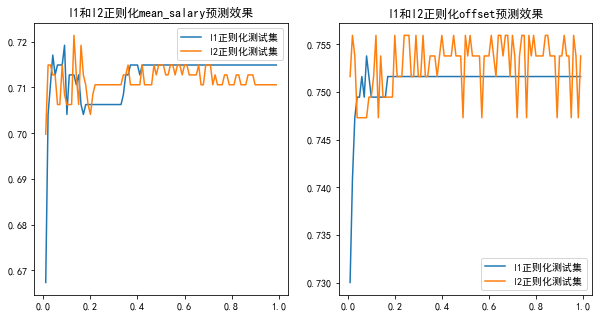

In [40]:
c = np.arange(0.01, 1, 0.01)
test11 = []
test21 = []
test12 = []
test22 = []
for i in range(len(c)):
    LR1 = LogisticRegression(penalty= 'l1', C= c[i], solver = 'liblinear', random_state = 16)
    LR2 = LogisticRegression(penalty= 'l2', C= c[i], solver = 'liblinear', random_state = 16)
    LR1.fit(X_train1, y_train1)#预测mean_salary
    LR2.fit(X_train1, y_train1)#预测mean_salary
    test11.append(accuracy_score(LR1.predict(X_test1), y_test1))
    test21.append(accuracy_score(LR2.predict(X_test1), y_test1))
    LR1.fit(X_train2, y_train2)#预测offset
    LR2.fit(X_train2, y_train2)#预测offset
    test12.append(accuracy_score(LR1.predict(X_test2), y_test2))
    test22.append(accuracy_score(LR2.predict(X_test2), y_test2))

p2 = plt.figure(figsize = (10, 5))
ax12 = p2.add_subplot(1, 2, 1)
ax22 = p2.add_subplot(1, 2, 2)
plt.sca(ax12)
plt.plot(c, test11, label= "l1正则化测试集",)
plt.plot(c, test21, label= "l2正则化测试集")
plt.title("l1和l2正则化mean_salary预测效果")
plt.legend()
plt.sca(ax22)
plt.plot(c, test12, label= "l1正则化测试集",)
plt.plot(c, test22, label= "l2正则化测试集")
plt.title("l1和l2正则化offset预测效果")
plt.legend()
print('预测mean_salary得分最高为：', max(enumerate(test21), key=lambda x: x[-1])[1])
print('此时的C为：', c[max(enumerate(test21), key=lambda x: x[-1])[0]])
print('预测mean_salary得分最高为：', max(enumerate(test22), key=lambda x: x[-1])[1])
print('此时的C为：', c[max(enumerate(test22), key=lambda x: x[-1])[0]])

D:\Users\ouyan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\Users\ouyan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\Users\ouyan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
D:\Users\ouyan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


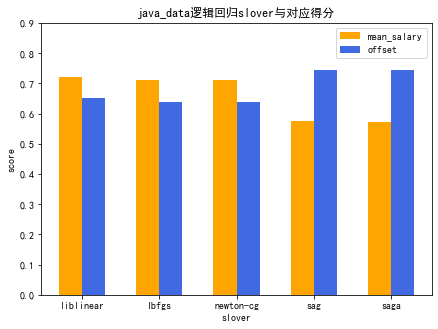

In [42]:
slovers = ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']  
scores1 = []  
scores2 = []  
for i in range(5):
    LR1 = LogisticRegression(penalty= 'l2', C= 0.13, solver = slovers[i], random_state = 16)
    LR2 = LogisticRegression(penalty= 'l2', C= 0.02, solver = slovers[i], random_state = 16)
    LR1.fit(X_train1, y_train1)
    LR2.fit(X_train2, y_train2)
    score1 = accuracy_score(LR1.predict(X_test1), y_test1)
    score2 = accuracy_score(LR1.predict(X_test2), y_test2)
    scores1.append(score1)
    scores2.append(score2)
x = np.arange(5) 
plt.figure(figsize = (7, 5))
plt.bar(x + 0.00, scores1, color='orange', width=0.3, label="mean_salary")  
plt.bar(x + 0.30, scores2, color='royalblue', width=0.3, label="offset")  
plt.xticks(x + 0.15, slovers)  
plt.xlabel("slover")  
plt.ylabel("score")  
plt.ylim(ymax = 0.9)
plt.title('java_data逻辑回归slover与对应得分')
plt.legend()  
plt.savefig("java_data逻辑回归slover与对应得分.png")

In [113]:
def MyGridResearch(X_train1, y_train1, X_train2, y_train2, X_test1, y_test1, X_test2, y_test2):
    arr1 = [None, 'balanced']
    arr2 = [None]
    salary_max = 0
    offset_max = 0
    salary_best = {}
    offset_best = {}
    for i in range(99):
        arr1.append({0:np.arange(0.01, 1, 0.01)[i], 1:(1-np.arange(0.01, 1, 0.01)[i])})
        arr2.append(0.01 + i * 0.01)
    for i in range(101):
        LR1 = LogisticRegression(penalty= 'l2', C= 0.13, solver = 'liblinear', class_weight = arr1[i], random_state = 16)
        LR2 = LogisticRegression(penalty= 'l2', C= 0.02, solver = 'liblinear', class_weight = arr1[i], random_state = 16)
        for j in range(100):
            LR1.fit(X_train1, y_train1, sample_weight = arr2[j])
            LR2.fit(X_train2, y_train2, sample_weight = arr2[j])
            score1 = accuracy_score(LR1.predict(X_test1), y_test1)
            score2 = accuracy_score(LR2.predict(X_test2), y_test2)
            if score1 > salary_max:
                salary_max = score1
                salary_best = {'cw':arr1[i], 'sw':arr2[j]}
            if score2 > offset_max:
                offset_max = score2
                offset_best = {'cw':arr1[i], 'sw':arr2[j]}
    print('预测mean_salary的最高得分为：', salary_max)
    print('此时的class_weight为', salary_best['cw'])
    print('此时的sample_weight为', salary_best['sw'])
    print('预测offset的最高得分为：', offset_max)
    print('此时的class_weight为', offset_best['cw'])
    print('此时的sample_weight为', offset_best['sw'])

In [114]:
MyGridResearch(X_train1, y_train1, X_train2, y_train2, X_test1, y_test1, X_test2, y_test2)

预测mean_salary的最高得分为： 0.7235421166306696
此时的class_weight为 {0: 0.48000000000000004, 1: 0.52}
此时的sample_weight为 0.74
预测offset的最高得分为： 0.7602591792656588
此时的class_weight为 {0: 0.47000000000000003, 1: 0.53}
此时的sample_weight为 0.65


In [134]:
lr1 = LogisticRegression(penalty= 'l2', C = 0.13, solver = 'liblinear', class_weight = {0:0.48, 1:0.52}, random_state = 16)
lr1.fit(X_train1, y_train1, sample_weight = 0.74)
pre1 = lr1.predict(X_test1)
lr2 = LogisticRegression(penalty= 'l2', C = 0.02, solver = 'liblinear', class_weight = {0:0.47, 1:0.53}, random_state = 16)
lr2.fit(X_train2, y_train2, sample_weight = 0.65)
pre2 = lr2.predict(X_test2)

Text(32.5, 0.5, '真实值')

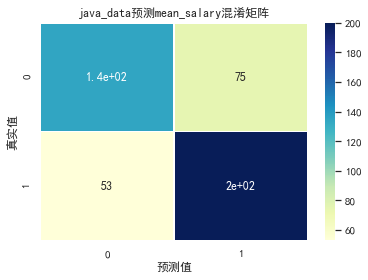

In [126]:
f, ax = plt.subplots()
C1= confusion_matrix(y_test1, pre1, labels=[0, 1])
sns.heatmap(C1,annot=True, ax=ax, linewidths=.5, cmap="YlGnBu") #画热力图
ax.set_title('java_data预测mean_salary混淆矩阵') #标题
ax.set_xlabel('预测值') #x轴
ax.set_ylabel('真实值') #y轴

Text(32.5, 0.5, '真实值')

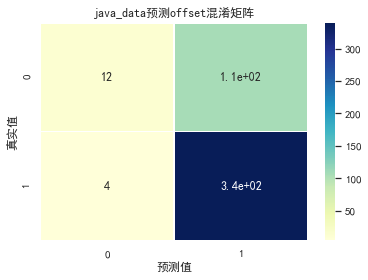

In [127]:
f, ax = plt.subplots()
C2= confusion_matrix(y_test2, pre2, labels=[0, 1])
sns.heatmap(C2,annot=True, ax=ax, linewidths=.5, cmap="YlGnBu") #画热力图
ax.set_title('java_data预测offset混淆矩阵') #标题
ax.set_xlabel('预测值') #x轴
ax.set_ylabel('真实值') #y轴

In [144]:
print('java_data预测mean_salary的分类报告:')
print(classification_report(y_test1, pre1))
print('AUC：', roc_auc_score(y_test1, pre1))
print('-----------------------------------------------------')
print('java_data预测offset的分类报告:')
print(classification_report(y_test2, pre2))
print('AUC：', roc_auc_score(y_test2, pre2))

java_data预测mean_salary的分类报告:
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       210
           1       0.73      0.79      0.76       253

    accuracy                           0.72       463
   macro avg       0.72      0.72      0.72       463
weighted avg       0.72      0.72      0.72       463

AUC： 0.7166854884246188
-----------------------------------------------------
java_data预测offset的分类报告:
              precision    recall  f1-score   support

           0       0.75      0.10      0.18       119
           1       0.76      0.99      0.86       344

    accuracy                           0.76       463
   macro avg       0.76      0.54      0.52       463
weighted avg       0.76      0.76      0.68       463

AUC： 0.5446062145788548


In [155]:
lr1 = LogisticRegression(penalty= 'l2', C = 0.13, solver = 'liblinear', class_weight = {0:0.48, 1:0.52}, random_state = 16)
lr1.fit(X_train1, y_train1, sample_weight = 0.74)
apply = np.array([4, #融资阶段为B轮对应financeStage为4
                  2, #本科学历对应education为2
                  (500+2000)/2, #公司规模companySize为范围极值的平均值
                  (3+5)/2, #工作经历workYear为范围极值的平均值
                  4 #丰台区对应district为4
])
lr2 = LogisticRegression(penalty= 'l2', C = 0.02, solver = 'liblinear', class_weight = {0:0.47, 1:0.53}, random_state = 16)
lr2.fit(X_train2, y_train2, sample_weight = 0.65)
pre1 = lr1.predict(apply.reshape(1, -1))
pre2 = lr2.predict(apply.reshape(1, -1))
print('该岗位的预测薪资', '大于' if pre1 == 1 else '小于等于', '25000元，', '上下浮动范围', '大于' if pre2 == 1 else '小于等于', '5000元')

该岗位的预测薪资 小于等于 25000元， 上下浮动范围 大于 5000元


In [151]:
pre2

array([1], dtype=int64)